# Сборный проект №1

___
**Описание проекта**  

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

___
**Цель исследования**

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

___
**Описание данных:**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными.*


<h1>Содержание<span class="tocSkip"></span></h1><br>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1.&nbsp;&nbsp;</span>Изучение общей информации</a></span></li>
        <li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2.&nbsp;&nbsp;</span>Предобработка данных</a></span></li>
        <li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3.&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li>
        <li><span><a href="#Составление-портрета-пользователя-каждого-региона" data-toc-modified-id="Составление-портрета-пользователя-каждого-региона-4"><span class="toc-item-num">4.&nbsp;&nbsp;</span>Составление портрета пользователя каждого региона</a></span></li>
        <li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5.&nbsp;&nbsp;</span>Проверка гипотез</a></span></li>
    </ul>
</div>

## Изучение общей информации

### Считаем данные из csv-файла в датафрейм и сохраним в переменную `df`. Путь к файлу:

`./games.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('./games.csv')
except:
    print('File_not_found')

### Изучим общую информацию о полученном датафрейме

**Добавим настройки для удобства отображения данных**

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.2f}'.format

#Если необходимо вернуть дефолтные настройки, раскомментируй строку ниже
#pd.reset_option('all')

**Выведем первые 10 строчек датафрейма `df` на экран.**

In [9]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Посмотрим на размер данных (количество строк, колонок).**

In [10]:
df.shape

(16715, 11)

**Просмотрим статистическую сводку каждой колонки, чтобы узнать распределение данных в каждой колонки. Используем метод `describe()`.**

In [11]:
df.describe(include = "all")

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,"16,446.00",16713,"16,715.00","16,715.00","16,715.00","16,715.00","8,137.00",10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,"2,006.48",NaN,0.26,0.15,0.08,0.05,68.97,NaN,NaN
std,NaN,NaN,5.88,NaN,0.81,0.50,0.31,0.19,13.94,NaN,NaN
min,NaN,NaN,"1,980.00",NaN,0.00,0.00,0.00,0.00,13.00,NaN,NaN
25%,NaN,NaN,"2,003.00",NaN,0.00,0.00,0.00,0.00,60.00,NaN,NaN
50%,NaN,NaN,"2,007.00",NaN,0.08,0.02,0.00,0.01,71.00,NaN,NaN
75%,NaN,NaN,"2,010.00",NaN,0.24,0.11,0.04,0.03,79.00,NaN,NaN


**Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Выявлены следующие проблемы:**

>* Необходимо привести названия колонок к змеиному регистру
>* Встречаются пропущенные данные в ячейках
>* Проверить, какие типы данных требуют изменения
>* Проверить дубликаты


## Предобработка данных

### Заменим названия столбцов (приведём к нижнему регистру)

In [13]:
df.columns = df.columns.str.lower()

### Обработаем пропуски

**Выведем количество пропущенных значений для каждой колонки.**

In [19]:
pd.DataFrame(df.isna().sum()).style.background_gradient('coolwarm')

,0
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,6701


**Выведем пропущенные значения в процентном соотношении.**

In [15]:
pd.DataFrame(df.isna().mean()).style.format("{:.1%}").background_gradient('coolwarm')

,0
name,0.0%
platform,0.0%
year_of_release,1.6%
genre,0.0%
na_sales,0.0%
eu_sales,0.0%
jp_sales,0.0%
other_sales,0.0%
critic_score,51.3%
user_score,40.1%


**Проверим пропуски в колонках `name` и `genre`.**

In [10]:
df.query('name.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
df.query('genre.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Удалим строки `659` и `14244`, т.к. данные в них практически отсутствуют.**

In [13]:
df = df.dropna(subset = ['name'])

**Начнем избавлятся от пропусков в колонке `year_of_release`. Создадим список всех имеющихся годов в списке `years`.**

In [14]:
years = [str(year) for year in range(1980, 2017)]

**Проверим, есть ли игры, у которых год записан в названии?**

In [15]:
for year in years:
    display(df.query('name.str.contains(@year) and year_of_release.isna() == True'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.00,8.1,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.00,8.7,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.00,tbd,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.00,8.8,E
5889,NBA Live 2003,GC,NaN,Sports,0.23,0.06,0.00,0.01,82.00,8.2,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.00,8.6,E
8918,All-Star Baseball 2005,XB,NaN,Sports,0.11,0.03,0.00,0.01,75.00,8.8,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
13929,Sega Rally 2006,PS2,NaN,Racing,0.00,0.00,0.04,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16079,Football Manager 2007,X360,NaN,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15953,PDC World Championship Darts 2008,DS,NaN,Sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13195,Tour de France 2011,X360,NaN,Racing,0.00,0.04,0.00,0.01,46.00,7.6,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.00,8.5,M


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Отлично, есть игры с годом в названии.**  
**Создадим функцию, которая будет брать год издания из названия игры и заполнять пропуски в колонке `year_of_release`.**

In [16]:
def filling_in_the_year(row):
    name = row['name']
    try:
        for year in years:
            if year in name and 'FIFA' in name:
                return int(year) - 1
            if year in name and 'NFL' in name:
                return int(year) - 1
            if year in name:
                return int(year)
    except:
        return 'error'
    

**Заполним пропуски в `year_of_release`.**

In [17]:
df['year_of_release'] = df['year_of_release'].fillna(df.apply(filling_in_the_year, axis = 1))

**Удалим остальные пропуски в `year_of_release`.**

In [18]:
df = df.dropna(subset=['year_of_release'])

**Рассмотрим данные в колонке `critic_score`.**

In [19]:
df['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

**Рассмотрим данные в колонке `user_score`.**

In [20]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

**В списке есть значение `tbd`, что в переводе означает `to be determined = будет определено`. Данное значение лучше отнести в пропуски данных, чтобы удобнее было работать с пропусками в дальнейшем.**

In [21]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

**Рассмотрим данные в колонке `rating`.**

In [22]:
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

**Проверим дубликаты.**

In [23]:
df.duplicated().sum()

0

### Преобразуем данные в более подходящие типы

In [24]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

**Переведем тип данных в колонке `year_of_release` в тип данных `int64`.**

In [26]:
df['year_of_release'] = df['year_of_release'].astype('int64')

### Опишите, в каких столбцах заменили тип данных и почему

**В колонке `user_score`, после изменения значения `tbd`, тип данных `О` переведен в тип данных `float64`. Т.к. тип данных `О` не поддается математическим расчетам.**

### Посчитаем суммарную продажу во всех регионах и запишем её в отдельную колонку `total_sale`

In [27]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы?

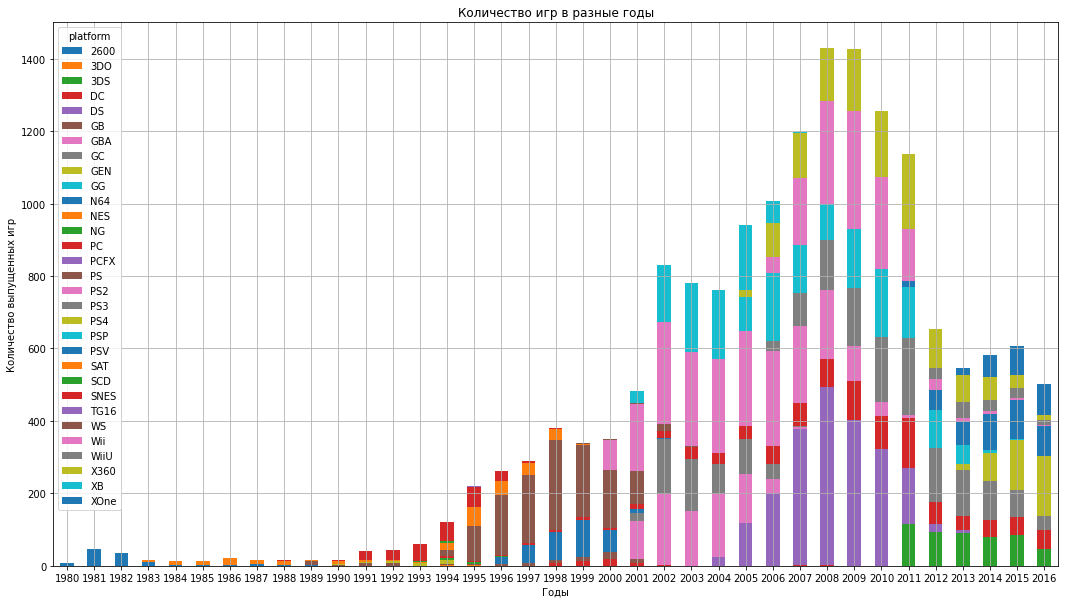

In [28]:
fig, ax = plt.subplots()

df.pivot_table(
    index='platform',
    columns='year_of_release',
    values='name',
    aggfunc=('count')
).T.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    figsize=(18, 10),
    grid=True
)

plt.xticks(rotation = 0)
ax.set_title('Количество игр в разные годы')
ax.set_xlabel('Годы')
ax.set_ylabel('Количество выпущенных игр')
plt.show()

In [29]:
pd.DataFrame(df.groupby('year_of_release')['name'].count())

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


**Видим начало роста игровой индустрии с `1992 года`. Активный рост начался в `2002 году` и достиг своего пика в `2008 году`.**

### Важны ли данные за все периоды?

**Нет. Данные периода `от 1980 до 1990 года` не является важным и его можно не учитывать, т.к. за этот период не было динамики роста/падения.**

### Посмотрим, как менялись продажи по платформам

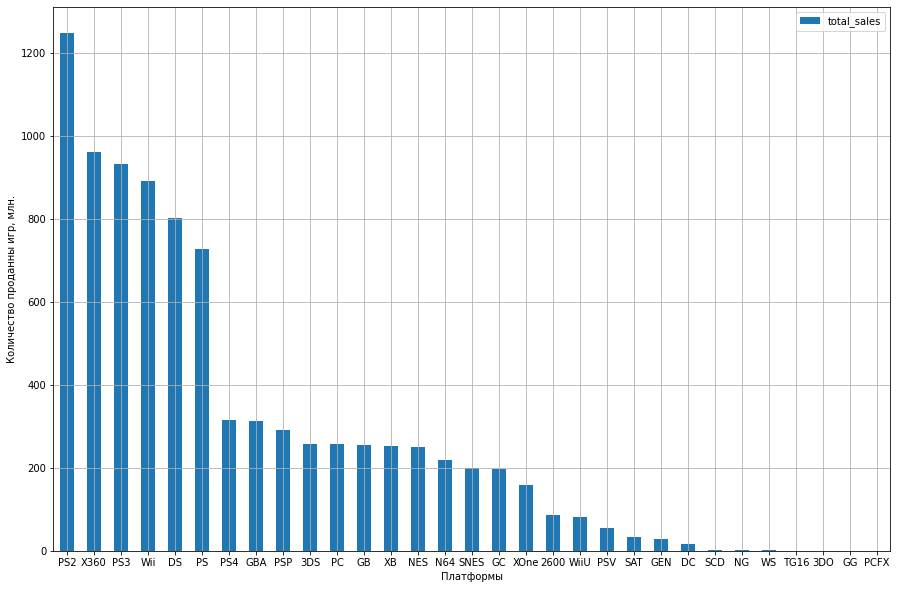

In [30]:
df.pivot_table(
    index='platform',
    values='total_sales',
    aggfunc=('sum')
).sort_values(
    by='total_sales',
    ascending=False
).plot(
    kind='bar',
    figsize=(15, 10),
    grid=True
)

plt.xticks(rotation = 0)
plt.xlabel('Платформы')
plt.ylabel('Количество проданны игр, млн.')
plt.show()

**Лидируют сдедующие платформы:**  

**`PS2` - PlayStation 2, вторая игровая приставка, выпущенная компанией Sony, наследница PlayStation и предшественница PlayStation 3**  
**`X360` - Xbox 360, вторая по счёту игровая приставка компании Microsoft, которая последовала за Xbox.**  
**`PS3` - PlayStation 3, игровая приставка седьмого поколения, третья основная в семействе игровых систем PlayStation**  
**`Wii` - игровая приставка 7-го поколения, 5-я домашняя консоль фирмы Nintendo**  
**`DS` - Nintendo DS, следующее поколение карманных игровых консолей компании Nintendo после Game Boy Advance SP.**  

### Выберем платформы с наибольшими суммарными продажами и построим распределение по годам

**Найдём 10 платформ с наибольшим количеством продаж.**

In [31]:
pd.DataFrame(df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)).head(10)

,total_sales
platform,
PS2,"1,247.28"
X360,961.30
PS3,931.34
Wii,891.18
DS,802.79
PS,727.58
PS4,314.14
GBA,312.88
PSP,290.34


**Создадим датафрейм в котором будут найденные 10 платформ:**

In [32]:
filtered_df = df[df['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'])]

**Сгруппируем данные по платформам и найдем суммарные продажи в каждом году.**

In [33]:
pvt_sum_total_sales = filtered_df.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).sort_values(
    by='year_of_release'
).fillna(0)

**Отобразим сгруппированные данные на графике.**

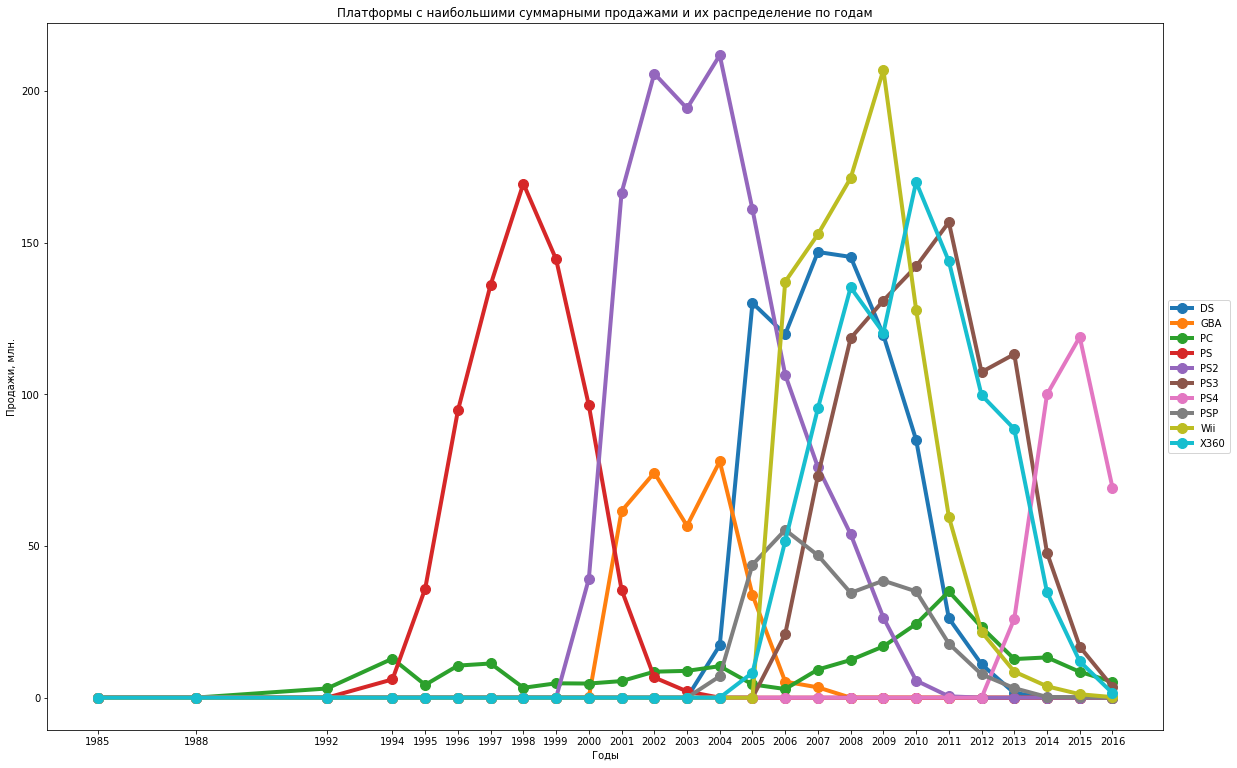

In [34]:
ax = pvt_sum_total_sales.plot(
    xticks=pvt_sum_total_sales.index,
    marker='o',
    markersize=10,
    linewidth=4,
    figsize=(20, 13)
)

plt.xticks(rotation = 0)
ylab = ax.set_ylabel('Продажи, млн.')
xlab = ax.set_xlabel('Годы')
plt.title('Платформы с наибольшими суммарными продажами и их распределение по годам')
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5), numpoints = 1)
plt.show()

**Практически все платформы имеют характерный рост на стадии своего создания и падние спустя 3-5 лет. Только ПК гейминг остается относительно стабильной платформой.**

### За какой характерный срок появляются новые и исчезают старые платформы?

**Сгруппируем данные по платформам и найдем первый год продажи игры на этой платформе и последний год.**

In [35]:
pvt_live_platform = df.pivot_table(
    index='platform',
    values='year_of_release',
    aggfunc=['min', 'max']
).sort_values(by=('min', 'year_of_release'))

**Добавим колонку `average_life` и в ней отобразим количество лет, когда выходили игры на платформе. Выведем первые 15 значений, а затем найдем среднее.**

In [36]:
pvt_live_platform['average_life'] = pvt_live_platform['max']['year_of_release'] - pvt_live_platform['min']['year_of_release']

display(pvt_live_platform.sort_values(by='average_life', ascending=False).head(10))

display('Средний срок жизни платформы', pvt_live_platform[pvt_live_platform['average_life'] >= 10]['average_life'].mean())

display('Медиана срока жизни платформы', pvt_live_platform[pvt_live_platform['average_life'] >= 10]['average_life'].median())

,min,max,average_life
,year_of_release,year_of_release,
platform,,,
PC,1985,2016,31
DS,1985,2013,28
GB,1988,2001,13
X360,2005,2016,11
PSP,2004,2015,11
PS2,2000,2011,11
NES,1983,1994,11
DC,1998,2008,10


'Средний срок жизни платформы'

14.6

'Медиана срока жизни платформы'

11.0

**Цикл жизни платформы составляет примерно `12 лет`.**

### Возьмем данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.

**Исходя из вышепроведенного исследования, актуальный период обозначим последние `4 года`. Это `от 2012 до 2016 года`. Остальные данные отбросим.**

In [37]:
years = [int(year) for year in range(2012, 2017)]
actual_df = df[df['year_of_release'].isin(years)]

In [38]:
actual_df['year_of_release'].sort_values().unique()

array([2012, 2013, 2014, 2015, 2016])

### Какие платформы лидируют по продажам, растут или падают?

**Сгруппируем данные по платформам и найдем суммарные продажи в каждом году.**

In [39]:
pvt_sum_actual_df = actual_df.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).sort_values(
    by='year_of_release'
).fillna(0)

**Отобразим сгруппированные данные на графике.**

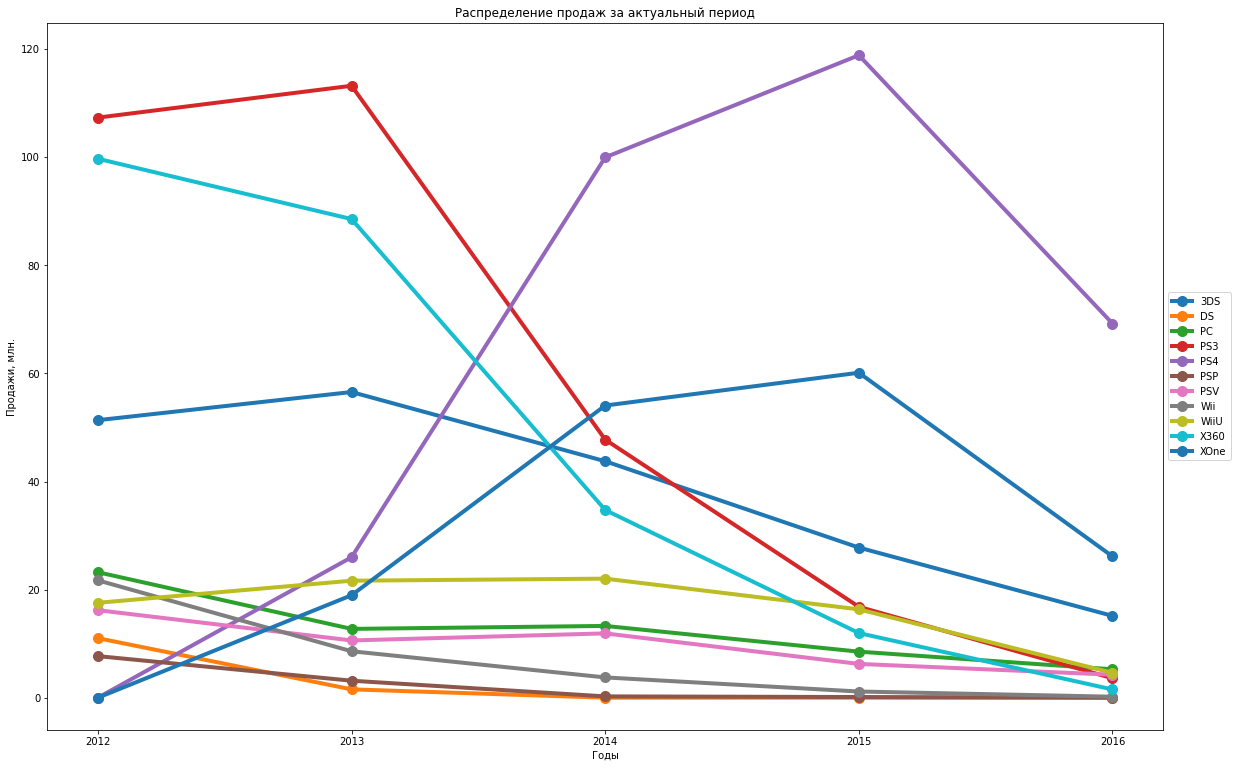

In [40]:
ax = pvt_sum_actual_df.plot(
    xticks=pvt_sum_actual_df.index,
    marker='o',
    markersize=10,
    linewidth=4,
    figsize=(20, 13)
)

plt.xticks(rotation = 0)
ylab = ax.set_ylabel('Продажи, млн.')
xlab = ax.set_xlabel('Годы')
plt.title('Распределение продаж за актуальный период')
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5), numpoints = 1)
plt.show()

**Согласно данным из графика, лидерами продаж за последние `4 года` являются платформы - `PlayStation 4` и `Xbox One`. Какое-то время еще будут актуальны `Nintendo 3DS`, `Wii U`, `Xbox 360`, `PlayStation 3` и `PC`.**  
**На графике нет растущих в продаже платформ.**  
**Все платформы имеют падение в продажах.**  
**Учитывая, что данные продаж за 2016 год могут быть неполными, нельзя твердо утверждать, что все платформы имеют падение в продажах.** 

### Построим график по глобальным продажам игр в разбивке по платформам

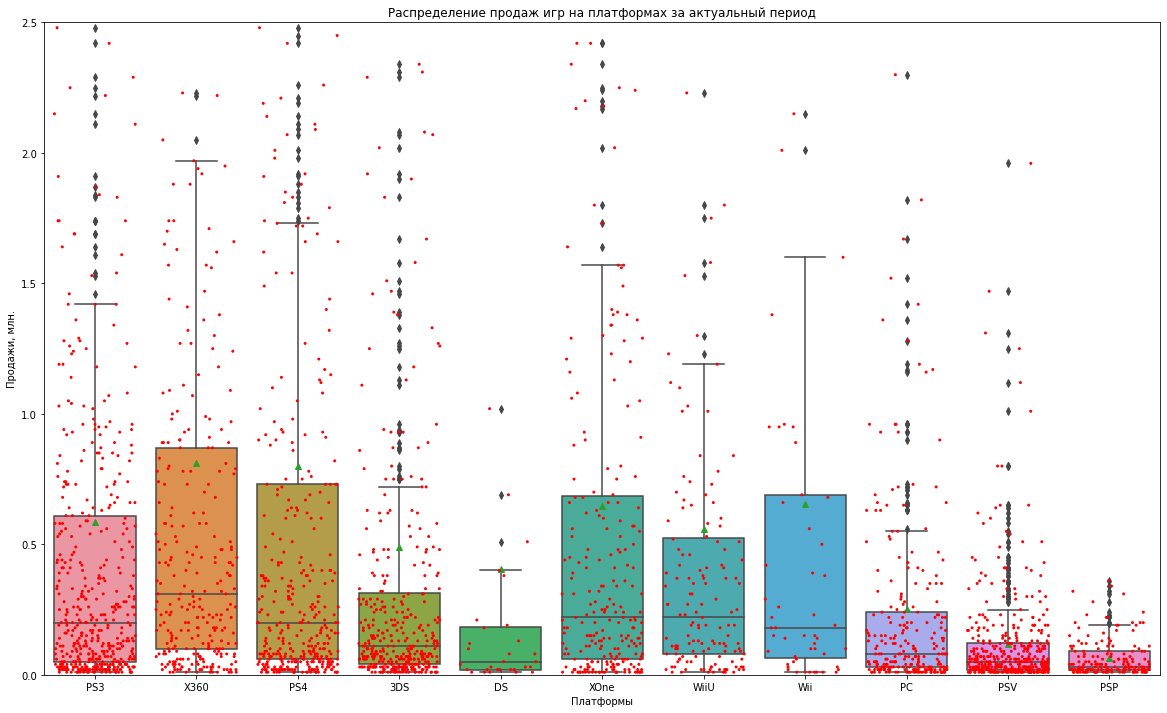

In [41]:
plt.figure(figsize=(20, 12))

ax = sns.boxplot(x='platform', y='total_sales', data=actual_df, showmeans=True)
ax = sns.stripplot(x='platform', y='total_sales', data=actual_df, color="red", jitter=0.4, size=3)
ax.set_ylim(0, 2.5)
ax.set_ylabel('Продажи, млн.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр на платформах за актуальный период')
plt.show()

**Медианны продаж смещены к нижнему краю – то есть на всех платформах выходит много игр с относительно небольшими продажами, это хорошо видно на stripplot. При этом везде есть бестселлеры, продажи которых в разы превышают медианные значения.**

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

**Выберем из `PlayStation 4` для анализа данных.**

**Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

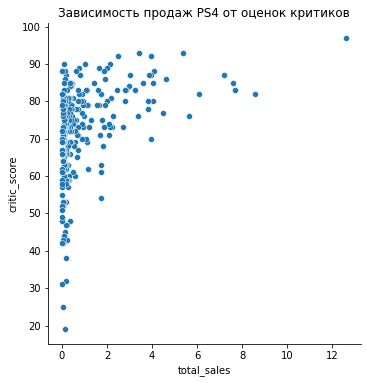

'Корреляция равна:'

0.406567902061781

In [42]:
sns.relplot(x='total_sales', y='critic_score', data=actual_df.query('platform == "PS4"'))
plt.title('Зависимость продаж PS4 от оценок критиков')
plt.show()
display('Корреляция равна:', actual_df.query('platform == "PS4"')['total_sales'].corr(actual_df.query('platform == "PS4"')['critic_score']))

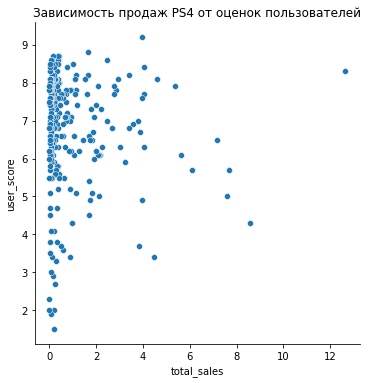

'Корреляция равна:'

-0.031957110204556376

In [43]:
sns.relplot(x='total_sales', y='user_score', data=actual_df.query('platform == "PS4"'))
plt.title('Зависимость продаж PS4 от оценок пользователей')
plt.show()
display('Корреляция равна:', actual_df.query('platform == "PS4"')['total_sales'].corr(actual_df.query('platform == "PS4"')['user_score']))

**Можем сделать вывод, что прямой зависимости продаж от отзывов - нет. Хотя зависимость продаж от отзывов критиков несколько выше, чем от отзывов пользователей.**

### Соотнесем выводы с продажами игр на других платформах

**Проанализируем данные в пратформе `Xbox One`.**

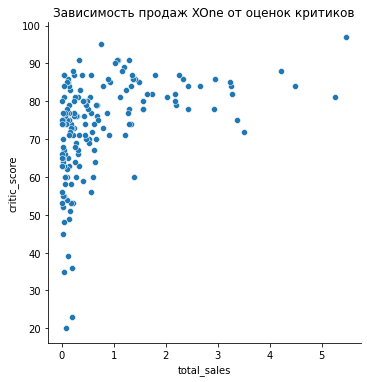

'Корреляция равна:'

0.41699832800840175

In [44]:
sns.relplot(x='total_sales', y='critic_score', data=actual_df.query('platform == "XOne"'))
plt.title('Зависимость продаж XOne от оценок критиков')
plt.show()
display('Корреляция равна:', actual_df.query('platform == "XOne"')['total_sales'].corr(actual_df.query('platform == "XOne"')['critic_score']))

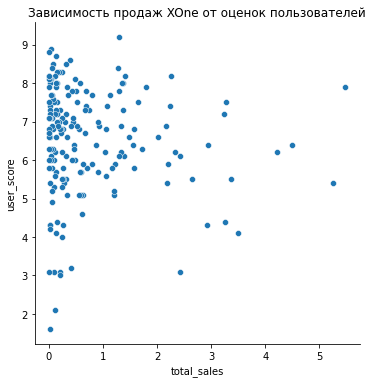

'Корреляция равна:'

-0.06892505328279412

In [45]:
sns.relplot(x='total_sales', y='user_score', data=actual_df.query('platform == "XOne"'))
plt.title('Зависимость продаж XOne от оценок пользователей')
plt.show()
display('Корреляция равна:', actual_df.query('platform == "XOne"')['total_sales'].corr(actual_df.query('platform == "XOne"')['user_score']))

**Проанализируем данные в пратформе `X360`.**

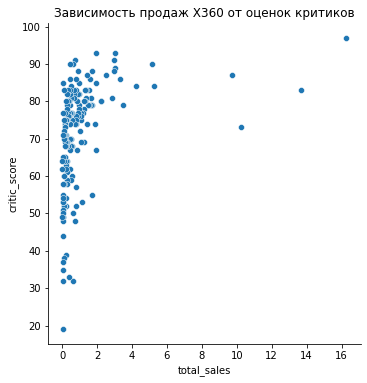

'Корреляция равна:'

0.36057348885073365

In [46]:
sns.relplot(x='total_sales', y='critic_score', data=actual_df.query('platform == "X360"'))
plt.title('Зависимость продаж X360 от оценок критиков')
plt.show()
display('Корреляция равна:', actual_df.query('platform == "X360"')['total_sales'].corr(actual_df.query('platform == "X360"')['critic_score']))

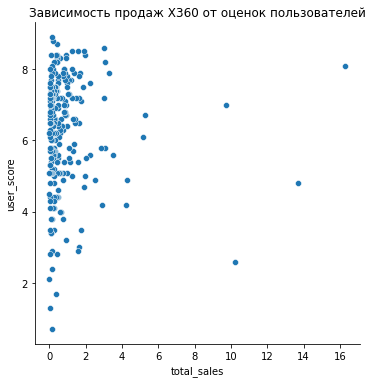

'Корреляция равна:'

0.0061639786462133256

In [47]:
sns.relplot(x='total_sales', y='user_score', data=actual_df.query('platform == "X360"'))
plt.title('Зависимость продаж X360 от оценок пользователей')
plt.show()
display('Корреляция равна:', actual_df.query('platform == "X360"')['total_sales'].corr(actual_df.query('platform == "X360"')['user_score']))

**Можем сделать вывод, что отзывы `критиков` несколько влияют на продажи, хотя заявлять о прямой зависимости нельзя.**

### Что можно сказать о самых прибыльных жанрах?

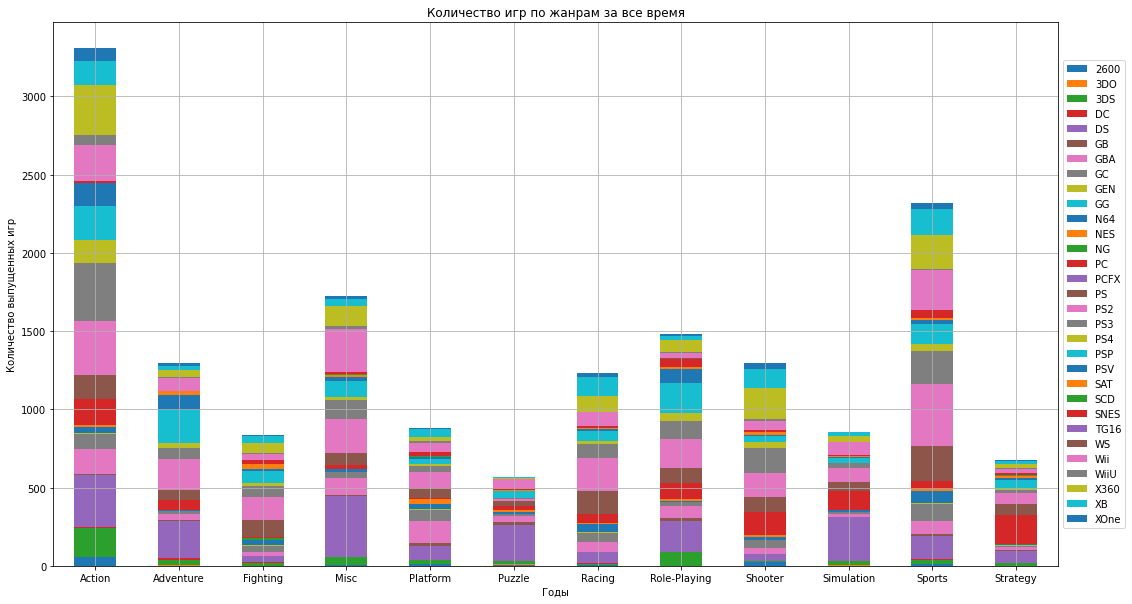

In [48]:
fig, ax = plt.subplots()

df.pivot_table(
    index='platform',
    columns='genre',
    values='name',
    aggfunc='count'
).T.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    figsize=(18, 10),
    grid=True
)

plt.xticks(rotation = 0)
ax.set_title('Количество игр по жанрам за все время')
ax.set_xlabel('Годы')
ax.set_ylabel('Количество выпущенных игр')
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5), numpoints = 1)
plt.show()

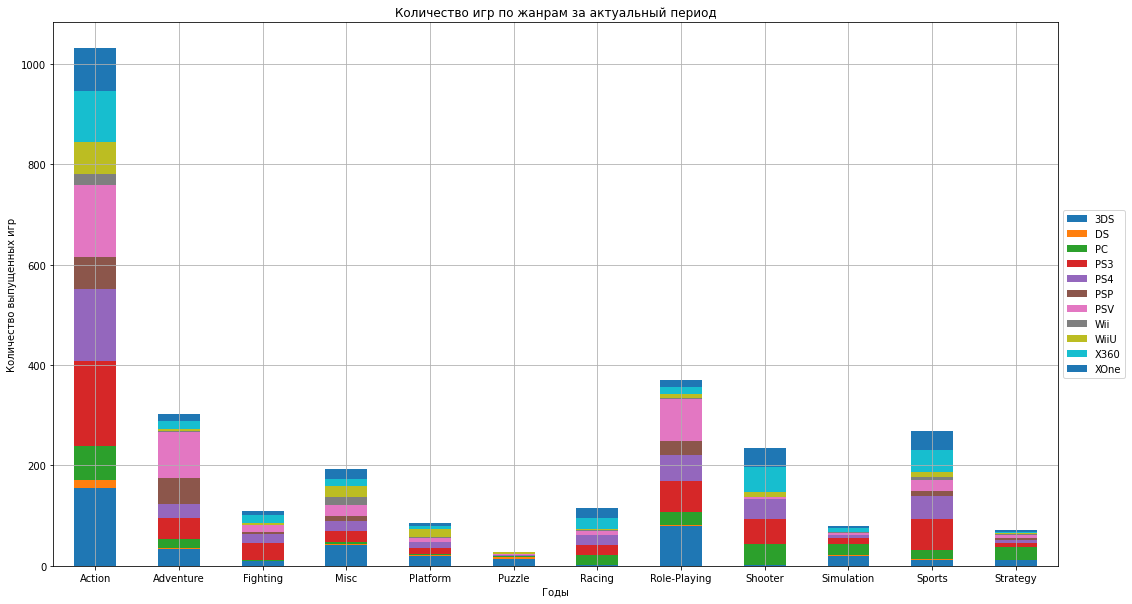

In [49]:
fig, ax = plt.subplots()

actual_df.pivot_table(
    index='platform',
    columns='genre',
    values='name',
    aggfunc='count'
).T.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    figsize=(18, 10),
    grid=True
)

plt.xticks(rotation = 0)
ax.set_title('Количество игр по жанрам за актуальный период')
ax.set_xlabel('Годы')
ax.set_ylabel('Количество выпущенных игр')
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5), numpoints = 1)
plt.show()

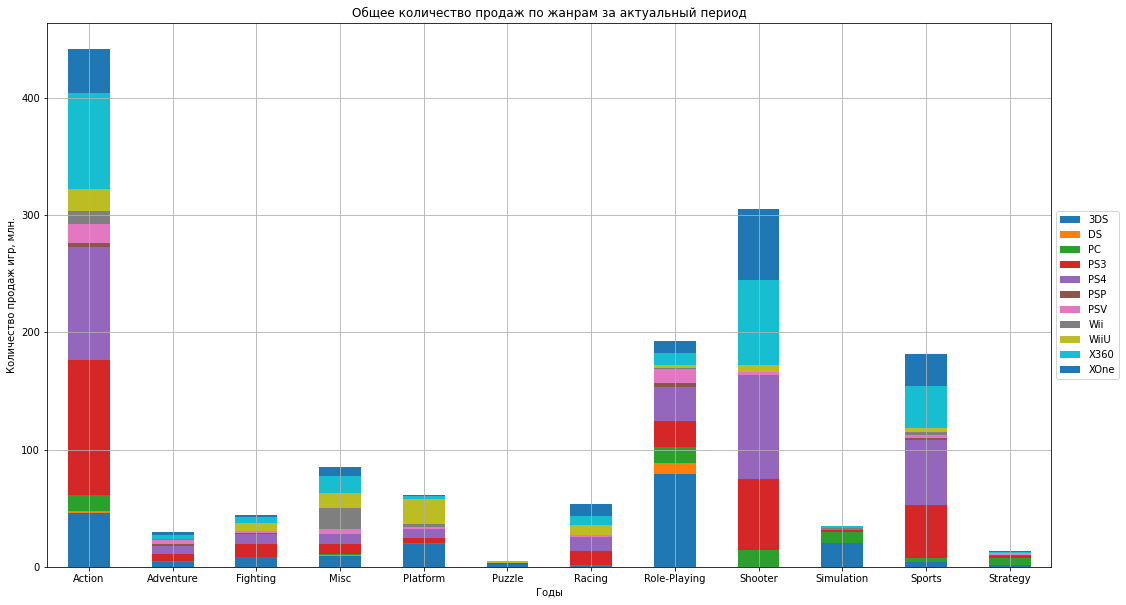

In [50]:
fig, ax = plt.subplots()

actual_df.pivot_table(
    index='platform',
    columns='genre',
    values='total_sales',
    aggfunc='sum'
).T.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    figsize=(18, 10),
    grid=True
)

plt.xticks(rotation = 0)
ax.set_title('Общее количество продаж по жанрам за актуальный период')
ax.set_xlabel('Годы')
ax.set_ylabel('Количество продаж игр, млн.')
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5), numpoints = 1)
plt.show()

**По количеству выпущенных игр и по количеству продаж лидируют жанры - `Action`, `Role-Playing`, `Sports`, `Shooter`.**

In [51]:
actual_df.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc=('mean', 'median')
).sort_values('mean', ascending=False).reset_index()

,genre,mean,median
0,Shooter,1.30,0.44
1,Platform,0.72,0.21
2,Sports,0.68,0.24
3,Role-Playing,0.52,0.14
4,Racing,0.47,0.14
5,Misc,0.44,0.12
6,Simulation,0.44,0.12
7,Action,0.43,0.12
8,Fighting,0.41,0.13
9,Strategy,0.19,0.08


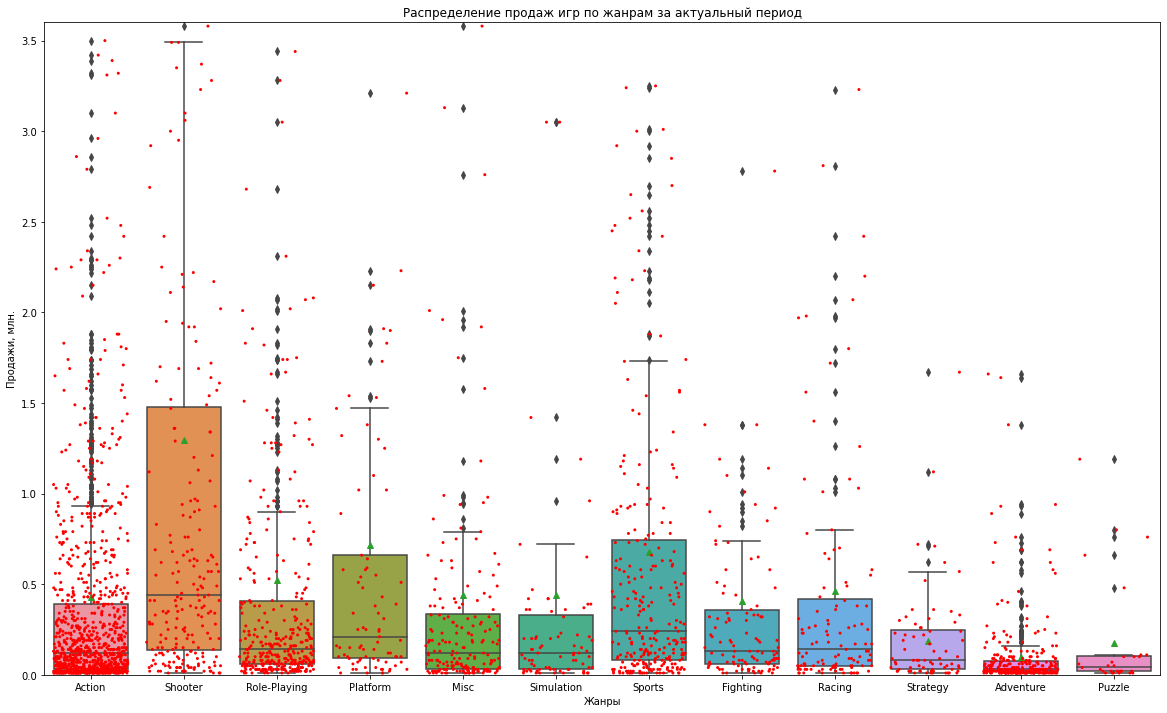

In [52]:
plt.figure(figsize=(20, 12))

ax = sns.boxplot(x='genre', y='total_sales', data=actual_df, showmeans=True)
ax = sns.stripplot(x='genre', y='total_sales', data=actual_df, color="red", jitter=0.4, size=3)
ax.set_ylim(0, 3.6)
ax.set_ylabel('Продажи, млн.')
ax.set_xlabel('Жанры')
ax.set_title('Распределение продаж игр по жанрам за актуальный период')
plt.show()

**График boxplot заставляет взглянуть иначе на первоначальные выводы, сделанные на основе по количеству выпущенных игр и по количеству продаж.**

**В жанре `Action` и `Role_Playing` видим, что медианны продаж смещены к нижнему краю – то есть, выходит большое количество игр с относительно небольшими продажами. Это ярко видно на графике stripplot. При этом есть бестселлеры, продажи которых в разы превышают медианные значения. Из бесстселлеров складывается график по количеству продаж. В этих жанрах, для будущих рекламных кампаний, стоит отсеять игры с небольшими продажами и сделать ставку на бестселлеры.**  

**Выгодно смотрятся жанры `Shooter`, `Platform` и `Sports`. На эти жанры тоже стоит сделать ставку в рекламных кампаниях.**

### Выделяются ли жанры с высокими и низкими продажами?

**Да. Жанры с высокими продажами: `Action`, `Sports`, `Shooter`.**  
**Жанры с низкими продажами: `Strategy`, `Adventure`, `Puzzle`.**

## Составление портрета пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP):

#### Самые популярные платформы (топ-5)

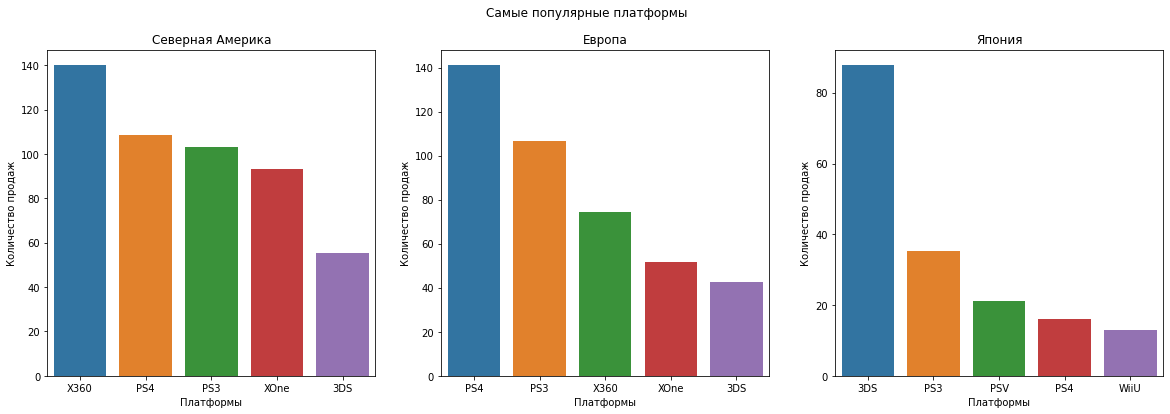

In [53]:
na_platforms = actual_df.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False).head(5)
eu_platforms = actual_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False).head(5)
jp_platforms = actual_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False).head(5)

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 6))

sns.barplot(x='platform', y='na_sales', data=na_platforms, ax=axes[0])
axes[0].set(xlabel="Платформы")
axes[0].set_title("Северная Америка")
axes[0].set(ylabel='Количество продаж')

sns.barplot(x='platform', y='eu_sales', data=eu_platforms, ax=axes[1])
axes[1].set(xlabel="Платформы")
axes[1].set_title("Европа")
axes[1].set(ylabel='Количество продаж')

sns.barplot(x='platform', y='jp_sales', data=jp_platforms, ax=axes[2])
axes[2].set(xlabel="Платформы")
axes[2].set_title("Япония")
axes[2].set(ylabel='Количество продаж')

fig.suptitle("Самые популярные платформы")
plt.show()

**В `Северной Америке` самыми популярными платформами являются `X360`, `PS3`, `Wii`, `DS`, `PS4`.**  
**В `Европе` самыми популярными платформами являются `PS3`, `X360`, `Wii`, `PS4`, `PC`.**  
**В `Японии` самыми популярными платформами являются `3DS`, `DS`, `PS3`, `PSP`, `Wii`.**  

#### Самые популярные жанры (топ-5)

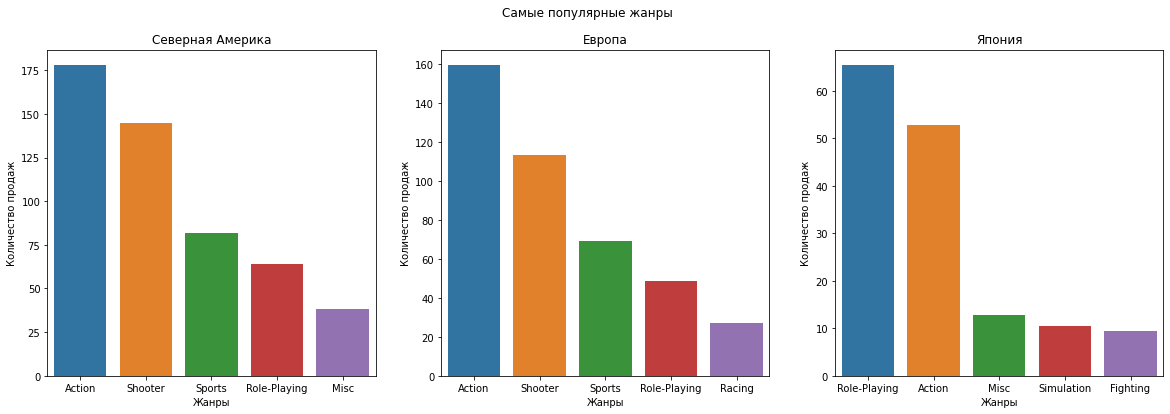

In [54]:
na_genres = actual_df.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False).head(5)
eu_genres = actual_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False).head(5)
jp_genres = actual_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False).head(5)

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 6))

sns.barplot(x='genre', y='na_sales', data=na_genres, ax=axes[0])
axes[0].set(xlabel="Жанры")
axes[0].set_title("Северная Америка")
axes[0].set(ylabel='Количество продаж')

sns.barplot(x='genre', y='eu_sales', data=eu_genres, ax=axes[1])
axes[1].set(xlabel="Жанры")
axes[1].set_title("Европа")
axes[1].set(ylabel='Количество продаж')

sns.barplot(x='genre', y='jp_sales', data=jp_genres, ax=axes[2])
axes[2].set(xlabel="Жанры")
axes[2].set_title("Япония")
axes[2].set(ylabel='Количество продаж')

fig.suptitle("Самые популярные жанры")
plt.show()

**В `Северной Америке` самыми популярными жанрами игр являются `Action`, `Shooter`, `Sports`, `Misc`, `Pole-Playing`.**  
**В `Европе` самыми популярными жанрами игр являются `Action`, `Shooter`, `Wii`, `Sports`, `Pole-Playing`.**  
**В `Японии` самыми популярными жанрами игр являются `Pole-Playing`, `Action`, `Misc`, `Sports`, `Adventure`.**  

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

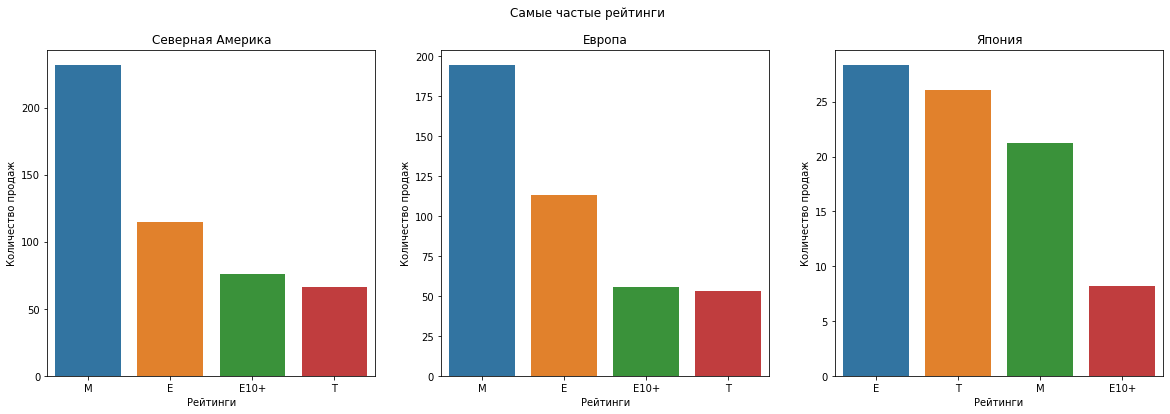

In [55]:
na_rating = actual_df.pivot_table(index='rating', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False).head(5)
eu_rating = actual_df.pivot_table(index='rating', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False).head(5)
jp_rating = actual_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False).head(5)

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 6))

sns.barplot(x='rating', y='na_sales', data=na_rating, ax=axes[0])
axes[0].set(xlabel="Рейтинги")
axes[0].set_title("Северная Америка")
axes[0].set(ylabel='Количество продаж')

sns.barplot(x='rating', y='eu_sales', data=eu_rating, ax=axes[1])
axes[1].set(xlabel="Рейтинги")
axes[1].set_title("Европа")
axes[1].set(ylabel='Количество продаж')

sns.barplot(x='rating', y='jp_sales', data=jp_rating, ax=axes[2])
axes[2].set(xlabel="Рейтинги")
axes[2].set_title("Япония")
axes[2].set(ylabel='Количество продаж')

fig.suptitle("Самые частые рейтинги")
plt.show()

**Видим одинаковое распределение рейтингов в `Северной Америке` и в `странах Европы`. Связано это с тем, что игры производят для глобального рынка, и под каждую отдельную страну редко создается отдельная игра с отдельным рейтингом для неё. Однако распределение рейтингов в `Японии` отличается.**  
**Пока не понятно, как `рейтинг ESRB` влияет на продажи в отдельном регионе.**

**Заполним пропуски в колонке `rating` зачением `unknown` и посмотрим изменится ли график.**

In [56]:
actual_df['rating'] = actual_df['rating'].fillna('unknown')

/tmp/ipykernel_243/1712343898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_df['rating'] = actual_df['rating'].fillna('unknown')


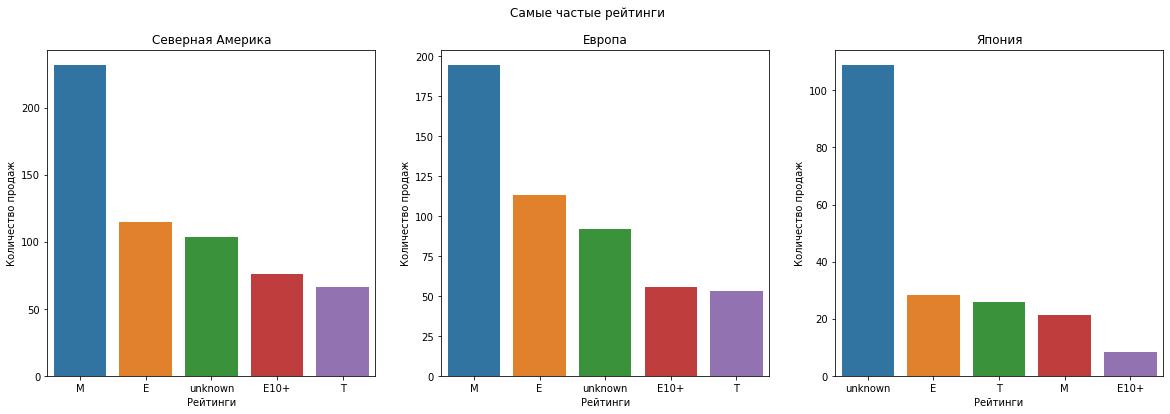

In [57]:
na_rating = actual_df.pivot_table(index='rating', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False).head(5)
eu_rating = actual_df.pivot_table(index='rating', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False).head(5)
jp_rating = actual_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False).head(5)

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 6))

sns.barplot(x='rating', y='na_sales', data=na_rating, ax=axes[0])
axes[0].set(xlabel="Рейтинги")
axes[0].set_title("Северная Америка")
axes[0].set(ylabel='Количество продаж')

sns.barplot(x='rating', y='eu_sales', data=eu_rating, ax=axes[1])
axes[1].set(xlabel="Рейтинги")
axes[1].set_title("Европа")
axes[1].set(ylabel='Количество продаж')

sns.barplot(x='rating', y='jp_sales', data=jp_rating, ax=axes[2])
axes[2].set(xlabel="Рейтинги")
axes[2].set_title("Япония")
axes[2].set(ylabel='Количество продаж')

fig.suptitle("Самые частые рейтинги")
plt.show()

**Распределение рейтингов в `Северной Америке` и в `странах Европы` по прежнему схожее.**  
**Теперь, распределение рейтингов в `Японии`, после заполнения пропусков, значительно отличается. Превалирует значение `unknown`. Возможно игры в `Японии` продаются без рейтинга или пропущенные данные скрывают важную информацию.**  
**С натяжкой можно предположить, что в `Северной Америке` и в `странах Европы` можно сделать ставку на рейтинги `M` и `E`.**

**Общее количество пропущенных данных в колонке `rating` составляет 40.5%. Эти проценты, своим количеством, могут кардинально изменить общее количество любого из рейтингов.  Из-за пропусков данных, однозначно заявить, что `рейтинг ESRB`, определенным образом влияет на продажи в отдельном регионе не представляется возможным.**

## Проверка гипотез

### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Подготовим данные. Получим данные по платформам Xbox One и PC и избавимся от пропусков.**

In [58]:
xbox = actual_df.query('platform == "XOne"')['user_score'].dropna()
pc = actual_df.query('platform == "PC"')['user_score'].dropna()

Сформулируем нулевую и альтернативную гипотезы:

 * H0 = средние пользовательские рейтинги платформ равны
 * H1 = средние пользовательские рейтинги платформ различаются

In [59]:
alpha = 0.05

results = st.ttest_ind(xbox, pc)

results.pvalue

0.5970211251516373

In [60]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нулевая гипотеза не может быть отвергнута")

Нулевая гипотеза не может быть отвергнута


**Раз нулевая гипотеза (средние пользовательские рейтинги платформ равны) не может быть отвергнута, значит, вероятно, что она верна.**  
**Сравним числовые значения.**

In [61]:
xbox.mean()

6.521428571428572

In [62]:
pc.mean()

6.43864734299517

### Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Подготовим данные. Получим данные по платформам Xbox One и PC и избавимся от пропусков.**

In [63]:
action = actual_df.query('genre == "Action"')['user_score'].dropna()
sports = actual_df.query('genre == "Sports"')['user_score'].dropna()

Сформулируем нулевую и альтернативную гипотезы:

 * H0 = средние пользовательские рейтинги жанров равны
 * H1 = средние пользовательские рейтинги жанров различаются

In [64]:
alpha = 0.05

results = st.ttest_ind(action, sports)

results.pvalue

2.8733525657180856e-26

In [65]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нулевая гипотеза не может быть отвергнута")

Отвергаем нулевую гипотезу


**Раз нулевая гипотеза "средние пользовательские рейтинги жанров равны" отвергается, то получается, что они различаются.**  
**Сравним числовые значения.**

In [66]:
action.mean()

6.82824427480916

In [67]:
sports.mean()

5.455897435897437

## Общий вывод

___
**`В процессе предобработки данных, найдены пропуски данных, неверно указынные типы данных, найдены и устранены редкие выбивающиеся значения:`**  

- Устранены пропуски в колонках `name` и `genre` в строках `659` и `14244`, т.к. данные в них практически отсутствовали.
- По возможности избавлись от пропусков в колонке `year_of_release`.
- В колонке `user_score` было значение tbd, что в переводе означает to be determined = будет определено. Данное значение было определено в пропуски данных, чтобы удобнее было работать с пропусками в дальнейшем.

___
**`Для удобства в дальнейших расчетов, в таблицу были добавлены новые колонки со следующими параметрами:`**  

- Суммарную продажу во всех регионах записана в отдельную колонку `total_sales`.  

___
**`Исследовательский анализ данных:`**  

**`Изучены и даны ответы на следующие вопросы:`**  


`Сколько игр выпускалось в разные годы?`
  * |1980|-|   9| 
  * |1981|-|  46|
  * |1982|-|  36|
  * |1983|-|  17|
  * |1984|-|  14|
  * |1985|-|  14|
  * |1986|-|  21|
  * |1987|-|  16|
  * |1988|-|  15|
  * |1989|-|  17|
  * |1990|-|  16|
  * |1991|-|  41|
  * |1992|-|  43|
  * |1993|-|  60|
  * |1994|-| 121|
  * |1995|-| 219|
  * |1996|-| 263|
  * |1997|-| 289|
  * |1998|-| 379|
  * |1999|-| 338|
  * |2000|-| 350|
  * |2001|-| 482|
  * |2002|-| 830|
  * |2003|-| 779|
  * |2004|-| 764|
  * |2005|-| 941|
  * |2006|-|1008|
  * |2007|-|1198|
  * |2008|-|1429|
  * |2009|-|1427|
  * |2010|-|1255|
  * |2011|-|1137|
  * |2012|-| 653|
  * |2013|-| 545|
  * |2014|-| 581|
  * |2015|-| 606|
  * |2016|-| 502|
  
  
`Вывод:`
* Видим начало роста игровой индустрии с 1992 года. Активный рост начался в 2002 году и достиг своего пика в 2008 году.  
  
  
`Важны ли данные за все периоды?`
* Нет. Данные периода от 1980 до 1990 года не является важным и его можно не учитывать, т.к. за этот период не было динамики роста/падения.
  
  
`Кто является лидером продаж по платформам?`
  * Лидируют сдедующие платформы:
    * PS2 - PlayStation 2, вторая игровая приставка, выпущенная компанией Sony, наследница PlayStation и предшественница PlayStation 3
    * X360 - Xbox 360, вторая по счёту игровая приставка компании Microsoft, которая последовала за Xbox.
    * PS3 - PlayStation 3, игровая приставка седьмого поколения, третья основная в семействе игровых систем PlayStation
    * Wii - игровая приставка 7-го поколения, 5-я домашняя консоль фирмы Nintendo
    * DS - Nintendo DS, следующее поколение карманных игровых консолей компании Nintendo после Game Boy Advance SP.


`Если выбирать платформы с наибольшими суммарными продажами и построим распределение по годам, что можно увидеть?`
* Практически все платформы имеют характерный рост на стадии своего создания и падние спустя 3-5 лет. Только ПК гейминг остается относительно стабильной платформой.
  
  
`За какой характерный срок появляются новые и исчезают старые платформы?`
* Цикл жизни платформы составляет примерно `12 лет`.


`Какие платформы лидируют по продажам, растут или падают?`
* Согласно данным из графика, лидерами продаж за последние `4 года` являются платформы - `PlayStation 4` и `Xbox One`. Какое-то время еще будут актуальны `Nintendo 3DS`, `Wii U`, `Xbox 360`, `PlayStation 3` и `PC`.
* На графике нет растущих в продаже платформ.
* Все платформы имеют падение в продажах.
* Учитывая, что данные продаж за 2016 год могут быть неполными, нельзя твердо утверждать, что все платформы имеют падение в продажах. 

`Если построим график по глобальным продажам игр в разбивке по платформам, что можно увидеть?`
* Медианны продаж смещены к нижнему краю – то есть на всех платформах выходит много игр с относительно небольшими продажами. При этом везде есть бестселлеры, продажи которых в разы превышают медианные значения.


`Посмотрим, как влияют на продажи внутри одной популярной платформы `PS4` отзывы пользователей и критиков. Если построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами, что можно увидеть?`
* Можем сделать вывод, что прямой зависимости продаж от отзывов - нет. Хотя зависимость продаж от отзывов критиков несколько выше, чем от отзывов пользователей.
  
  
`Соотнесем выводы с продажами игр на других платформах `XOne` и `X360`.`
* Можем сделать вывод, что отзывы критиков несколько влияют на продажи, хотя заявлять о прямой зависимости нельзя.


`Что можно сказать о самых прибыльных жанрах?`
* В жанре `Action` и `Role_Playing` видим, что медианны продаж смещены к нижнему краю – то есть, выходит большое количество игр с относительно небольшими продажами. Это ярко видно на графике stripplot. При этом есть бестселлеры, продажи которых в разы превышают медианные значения. Из бесстселлеров складывается график по количеству продаж. В этих жанрах, для будущих рекламных кампаний, стоит отсеять игры с небольшими продажами и сделать ставку на бестселлеры.
* Выгодно смотрятся жанры `Shooter`, `Platform` и `Sports`. На эти жанры тоже стоит сделать ставку в рекламных кампаниях.


`Выделяются ли жанры с высокими и низкими продажами?`
* Да. Жанры с высокими продажами: Action, Sports, Shooter.
* Жанры с низкими продажами: Strategy, Adventure, Puzzle.

___
**`Составим портрет пользователя каждого региона`**

Портрет пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5):
  * В Северной Америке самыми популярными платформами являются X360, PS3, Wii, DS, PS4.
  * В Европе самыми популярными платформами являются PS3, X360, Wii, PS4, PC.
  * В Японии самыми популярными платформами являются 3DS, DS, PS3, PSP, Wii.
* Самые популярные жанры (топ-5):
  * В Северной Америке самыми популярными жанрами игр являются Action, Shooter, Sports, Misc, Pole-Playing.
  * В Европе самыми популярными жанрами игр являются Action, Shooter, Wii, Sports, Pole-Playing.
  * В Японии самыми популярными жанрами игр являются Pole-Playing, Action, Misc, Sports, Adventure.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?
  * Распределение рейтингов в `Северной Америке` и в `странах Европы` по схожее.  
  * Распределение рейтингов в `Японии`, после заполнения пропусков, значительно отличается. Превалирует значение `unknown`. Возможно игры в `Японии` продаются без рейтинга или пропущенные данные скрывают важную информацию.
  * С натяжкой можно предположить, что в `Северной Америке` и в `странах Европы` можно сделать ставку на рейтинги `M` и `E`.
  * Общее количество пропущенных данных в колонке `rating` составляет 40.5%. Эти проценты, своим количеством, могут кардинально изменить общее количество любого из рейтингов.  Из-за пропусков данных, однозначно заявить, что `рейтинг ESRB`, определенным образом влияет на продажи в отдельном регионе не представляется возможным.

___
**`Проверим гипотезы`**

**`Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые`**  

`Сформулируем нулевую и альтернативную гипотезы:`
* H0 = средние пользовательские рейтинги платформ равны
* H1 = средние пользовательские рейтинги платформ различаются
`Ответ:`
* results.pvalue = 0.12295299227169836
* Нулевая гипотеза не может быть отвергнута

`Раз нулевая гипотеза (средние пользовательские рейтинги платформ равны) не может быть отвергнута, значит, вероятно, что она верна.`


**`Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.`**  

`Сформулируем нулевую и альтернативную гипотезы:`
* H0 = средние пользовательские рейтинги жанров равны
* H1 = средние пользовательские рейтинги жанров различаются
`Ответ:`
* results.pvalue = 1.640880566536975e-15
* Отвергаем нулевую гипотезу

`Раз нулевая гипотеза "средние пользовательские рейтинги жанров равны" отвергается, то получается, что они различаются.`

___
**`Рекомендации`**

*Для проведения успешной рекламной кампании, следует сделать упор на следующие параметры:

> 1. Необходимо в первую очередь рекламировать игры на платформах `PlayStation 4` и `Xbox One`. Далее игры на платформах `Nintendo 3DS`, `Wii U`, `Xbox 360`, `PlayStation 3` и `PC`. Остальные платформы стоит исключить.  

> 2. Необходимо отфильтровать игры с низким количеством продаж, и акцентировать внимание на бестселлерах.

> 3. Отзывы критиков несколько влияют на продажи, поэтому больше стоит рекламировать игры с высокими оценками от критиков.

> 4. Потенциально прибыльные жанры `Shooter`, `Platform` и `Sports`. А также `Action` и `Role_Playing` но, этих жанрах, для будущих рекламных кампаний, стоит отсеять игры с небольшими продажами и сделать ставку на бестселлеры

> 5. Необходимо учитывать жанры низкими продажами: `Strategy`, `Adventure`, `Puzzle`.

> 6. Портрет пользователя каждого региона (NA, EU, JP):
    * Самые популярные платформы (топ-5):
      * В Северной Америке самыми популярными платформами являются X360, PS3, Wii, DS, PS4.
      * В Европе самыми популярными платформами являются PS3, X360, Wii, PS4, PC.
      * В Японии самыми популярными платформами являются 3DS, DS, PS3, PSP, Wii.
    * Самые популярные жанры (топ-5):
      * В Северной Америке самыми популярными жанрами игр являются Action, Shooter, Sports, Misc, Pole-Playing.
      * В Европе самыми популярными жанрами игр являются Action, Shooter, Wii, Sports, Pole-Playing.
      * В Японии самыми популярными жанрами игр являются Pole-Playing, Action, Misc, Sports, Adventure.